# APRENDIZAJE ESTADISTICO TAREA 2
# Por: Julian Andres Montoya Carvajal
# C.C 1214727927

# Contenido :

* [Introduccion](#item1)
* [Librerias](#item2)
* [Entrenamiento en 1000 instancias](#item3)
* [Conclusiones](#item4)

<a name=item1></a>
## Introduccion

TAREA:
Entrene 1000 instancias de de regresión lineal donde los datos para cada una de las instancias están definidos por

x = 2 * np.random.rand(100,1)

y = 4 + 3 * x + np.random.rand(100,1)

De los estimados obtenidos para los parámetros de cada instancia de regresión, calcule el promedio y la desviación estándar, además grafique sus datos en un histograma y un diagrama de cajas.
Discuta sus resultados: el valor del promedio y la desviación estándar, la forma de la distribución resultante...

<a name=item2></a>
## Librerias

In [58]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

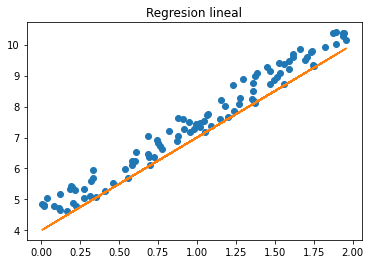

In [69]:
x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.rand(100,1)
plt.plot(x,y, 'o')
plt.plot(x, 4 + 3 * x, '-')
plt.title("Regresion lineal")
X = np.c_[np.ones((100,1)), x]

In [60]:
theta_hat = np.linalg.inv( X.T @ X ) @ X.T @ y

In [64]:
intercepto=theta_hat[0][0]
pendiente=theta_hat[1][0]
print("intercepto",intercepto)
print("pendiente",pendiente)

intercepto 4.464798529649242
pendiente 3.018946339503983


<a name=item3></a>
## Entrenamiento en 1000 instancias

In [40]:
inter=[]
pendi=[]

for i in range(1000):
    x = 2 * np.random.rand(100,1)
    y = 4 + 3 * x + np.random.rand(100,1)
    X = np.c_[np.ones((100,1)), x]
    theta_hat = np.linalg.inv( X.T @ X ) @ X.T @ y
    inter.append(theta_hat[0][0])
    pendi.append(theta_hat[1][0])

In [66]:
prointer=np.mean(inter)
propendi=np.mean(pendi)
stdinter=np.std(inter)
stdpendi=np.std(pendi)
print("promedio del intercepto",prointer)
print("promedio de la pendiente",propendi)
print("desviacion estandar del intercepto",stdinter)
print("desviacion estandar de la pendiente",stdpendi)

promedio del intercepto 4.4984568185590375
promedio de la pendiente 2.9995690701388886
desviacion estandar del intercepto 0.058005638200705714
desviacion estandar de la pendiente 0.05113083348070271


In [75]:
vinter=4
vpendi=3
errorinter=prointer-vinter
errorpendi=propendi-vpendi
errorrelinter=np.abs(errorinter)*100/vinter
errorrelpendi=np.abs(errorpendi)*100/vpendi
print("error porcentual del intercepto",errorrelinter)
print("error porcentual de la pendiente",errorrelpendi)

error porcentual del intercepto 12.461420463975937
error porcentual de la pendiente 0.01436432870371244


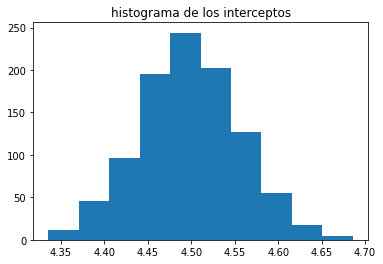

In [68]:
plt.title("histograma de los interceptos")
plt.hist(inter);

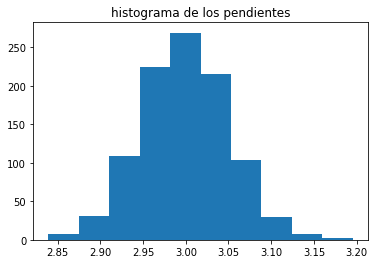

In [67]:
plt.title("histograma de los pendientes")
plt.hist(pendi);

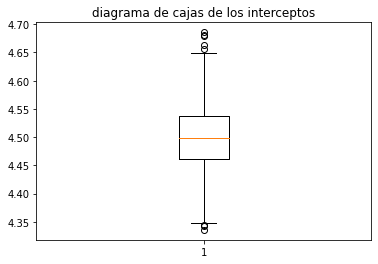

In [71]:
plt.title("diagrama de cajas de los interceptos")
plt.boxplot(inter);

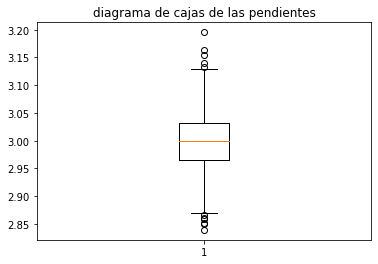

In [70]:
plt.title("diagrama de cajas de las pendientes")
plt.boxplot(pendi);

<a name=item4></a>
## Conclusiones

De acuerdo con lo anterior de los histogramas se puede observar que la gran mayoria de datos tanto para la pendiente como para el intercepto se encuentran alrededor de un valor central, podemos observar que en ambos casos parece corresponder a una distribucion gausssiana, lo cual quiere decir que el ruido que se establecio para los datos de entrenamiento de la regresion lineal corresponden a un ruido gaussiano.

El error procentual para la pendiente es muy bajo mientras que para el intercepto este error porcentual se encuentra alrededor del 12.46% de manera que podemos afirmar que el bias o intercepto es quien mas error puede llegar a tener. Aun asi las desviaciones estandar son valores pequeños lo cual da cuenta de que casi todos los valores se encuentran muy cercanos y tendiendo a un mismo valor promedio.

Por ultimo podemos encontrar en el diagrama de cajas que los outliers se encuentran ubicados tanto por debajo como por arriba en igual proporcion volviendo otra vez a darnos idea de la distribucion gaussiana en el ruido que poseen los datos. Ademas se puede observar que la mediana en este diagrama se ubica en la parte central de las cajas, lo cual es un indicio de una distribucion normal en los datos.